# Predictive Modeling and Optimization of Manufacturing Defects to Enhance Production Efficiency and Cost-effectiveness

### by Aditiya Fajar Bekti

## Dataset Variable Descriptions

* `ProductionVolume`: Number of units produced per day.
* `ProductionCost`: Cost incurred for production per day (in USD).
* `SupplierQuality`: Quality ratings of suppliers (in percent %).
* `DeliveryDelay`: Average delay in delivery (in days).
* `DefectRate`: Defects per thousand units produced.
* `QualityScore`: Overall quality assessment (in percent %).
* `MaintenanceHours`: Hours spent on maintenance per week (in hours).
* `DowntimePercentage`: Percentage of production downtime (in percent %).
* `InventoryTurnover`: Ratio of inventory turnover.
* `StockoutRate`: Rate of inventory stockouts (in percent %).
* `WorkerProductivity`: Productivity level of the workforce (in percent %).
* `SafetyIncidents`: Number of safety incidents per month.
* `EnergyConsumption`: Energy consumed (in kWh).
* `EnergyEfficiency`: Efficiency factor of energy usage.
* `AdditiveProcessTime`: Time taken for additive manufacturing (in hours).
* `AdditiveMaterialCost`: Cost of additive materials per unit (in USD).
* `DefectStatus`: Predicted defect status (0 for Low Defects, 1 for High Defects).

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
data_ori = pd.read_csv('manufacturing_defect_dataset.csv')
data_ori.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


## Statistical Summary

In [3]:
summary_stats = data_ori.describe(include='all')
summary_stats

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.558951,2.749116,80.134272,11.476543,2.501373,6.019662,0.050878,90.040115,4.591667,2988.494453,0.299776,5.472098,299.515479,0.840432
std,262.402073,4308.051904,5.759143,1.705804,1.310154,11.611750,6.872684,1.443684,2.329791,0.028797,5.723600,2.896313,1153.420820,0.116400,2.598212,116.379905,0.366261
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.004960,0.000000,1000.720156,0.100238,1.000151,100.211137,0.000000
25%,322.000000,8728.829280,84.869219,1.000000,1.598033,70.103420,5.750000,1.264597,3.983249,0.026200,85.180203,2.000000,1988.140273,0.200502,3.228507,194.922058,1.000000
50%,549.000000,12405.204656,89.704861,3.000000,2.708775,80.265312,12.000000,2.465151,6.022389,0.051837,90.125743,5.000000,2996.822301,0.297470,5.437134,299.728918,1.000000
75%,775.250000,16124.462428,94.789936,4.000000,3.904533,90.353822,17.000000,3.774861,8.050222,0.075473,95.050838,7.000000,3984.788299,0.402659,7.741006,403.178283,1.000000
max,999.000000,19993.365549,99.989214,5.000000,4.998529,99.996993,23.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782,1.000000


* The dataset consists of 3,240 rows with various attributes, including production volume, costs, defect rates, and other operational metrics.
* There are no suspicious outliers, but some columns, such as `EnergyConsumption` and `AdditiveMaterialCost`, have a fairly wide range of values.

## Data Cleaning

* Check for duplicates
* Check for missing values

In [4]:
# Check for duplicates
duplicates = data_ori.duplicated().sum
duplicates

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
3235    False
3236    False
3237    False
3238    False
3239    False
Length: 3240, dtype: bool>

* From the Boolean series resulting from the `duplicated()` data check, it indicates whether a particular row is a duplicate (`True`) or not (`False`).
* From this, we know that there are no duplicate data entries.

In [5]:
# Ensure proper summation of duplicates
duplicates = data_ori.duplicated(keep=False).sum()
duplicates

np.int64(0)

* It is confirmed that there are no duplicate rows in the dataset. The total number of detected duplicates is **0**.
* This means the dataset is unique and does not require duplicate row removal.

In [6]:
# Check for missing values
missing_values = data_ori.isnull().sum()
missing_values

ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
dtype: int64

* There are no missing values (missing values = **0** for all columns)

## Outlier Analysis

In [7]:
# Check for outliers using the interquartile range (IQR) method
def detect_outliers_iqr(data_ori, column):
    Q1 = data_ori[column].quantile(0.25)
    Q3 = data_ori[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data_ori[(data_ori[column] < lower_bound) | (data_ori[column] > upper_bound)]

# Detect outliers in numeric columns
numeric_columns = data_ori.select_dtypes(include=[np.number]).columns
outlier_counts = {col: len(detect_outliers_iqr(data_ori, col)) for col in numeric_columns}
outlier_counts

{'ProductionVolume': 0,
 'ProductionCost': 0,
 'SupplierQuality': 0,
 'DeliveryDelay': 0,
 'DefectRate': 0,
 'QualityScore': 0,
 'MaintenanceHours': 0,
 'DowntimePercentage': 0,
 'InventoryTurnover': 0,
 'StockoutRate': 0,
 'WorkerProductivity': 0,
 'SafetyIncidents': 0,
 'EnergyConsumption': 0,
 'EnergyEfficiency': 0,
 'AdditiveProcessTime': 0,
 'AdditiveMaterialCost': 0,
 'DefectStatus': 517}

* Only the `DefectStatus` column has significant outliers (517 values).
* This likely reflects an imbalanced data distribution between defective and non-defective products. Thus, it is not a pure outlier but rather an effect of data imbalance in the `DefectStatus` column. 
* All other numeric columns do not show significant outliers based on the IQR analysis.

## Correlation Analysis

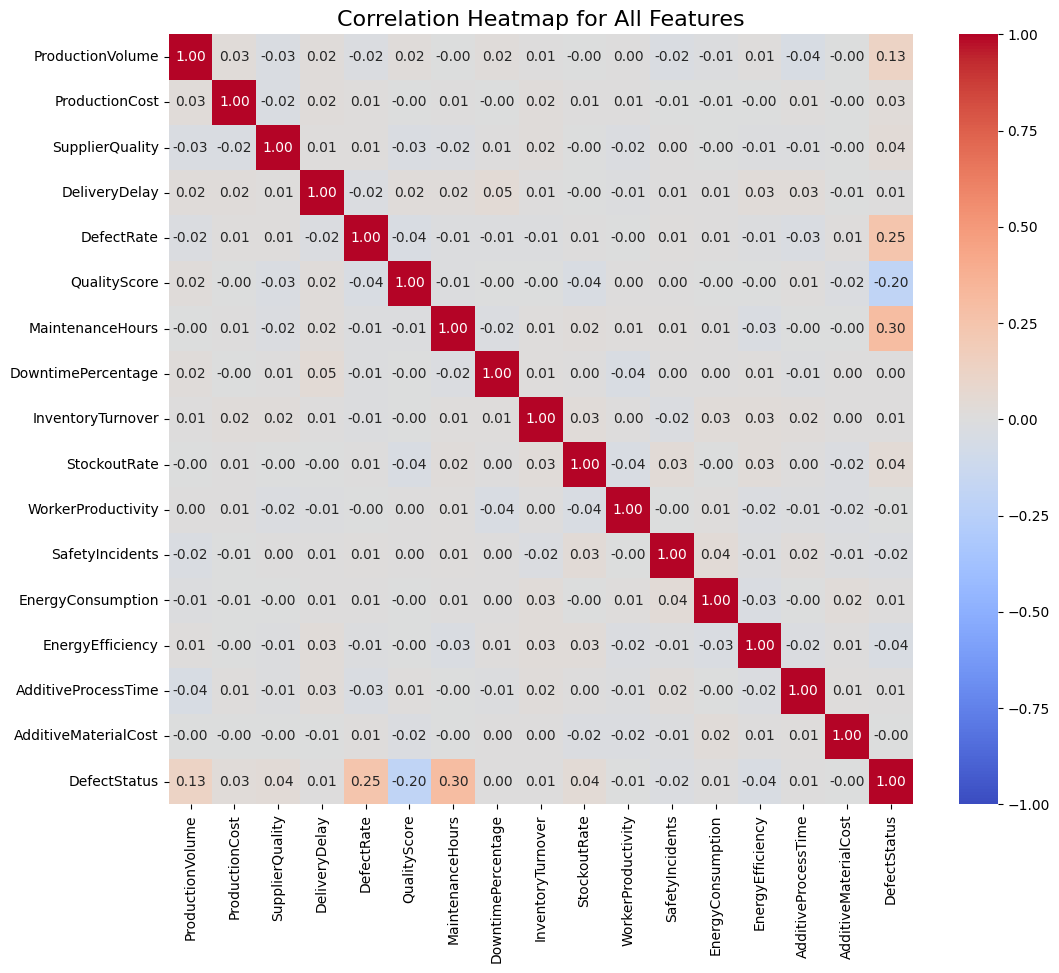

In [8]:
# Generate a correlation matrix for the dataset
correlation_matrix = data_ori.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Heatmap for All Features', fontsize=16)
plt.show()

In [9]:
# Correlation analysis to check the relationship between features and target
correlation_with_target = data_ori.corr()['DefectStatus'].sort_values(ascending=False)

correlation_with_target

DefectStatus            1.000000
MaintenanceHours        0.297107
DefectRate              0.245746
ProductionVolume        0.128973
StockoutRate            0.040574
SupplierQuality         0.038184
ProductionCost          0.026720
InventoryTurnover       0.006733
AdditiveProcessTime     0.005619
DeliveryDelay           0.005425
EnergyConsumption       0.005039
DowntimePercentage      0.004128
AdditiveMaterialCost   -0.000953
WorkerProductivity     -0.005224
SafetyIncidents        -0.016039
EnergyEfficiency       -0.035031
QualityScore           -0.199219
Name: DefectStatus, dtype: float64

* `MaintenanceHours`: Moderate positive correlation (0.30).
* `DefectRate`: Weak positive correlation (0.25).
* `ProductionVolume`: Weak positive correlation (0.13).
* Features with negative correlations to the target (e.g., `QualityScore`, `EnergyEfficiency`, `WorkerProductivity`, etc.) should not be dropped, as these features are still relevant and hold valuable information in real-world applications.

## Exploratory Data Analysis (EDA)

### Univariate Analysis: Target Variable (`DefectStatus`)

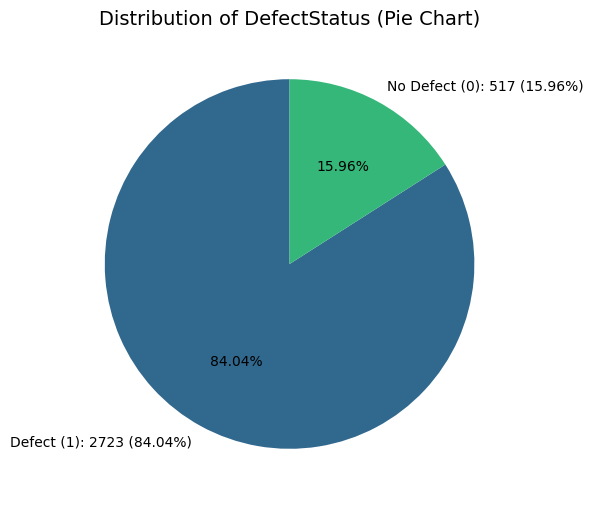

In [10]:
# Count the number of data points for each class
class_counts = data_ori['DefectStatus'].value_counts()
percentages = class_counts / class_counts.sum() * 100

# Combine counts and percentages for pie chart labels
labels = [
    f'Defect (1): {class_counts[1]} ({percentages[1]:.2f}%)',
    f'No Defect (0): {class_counts[0]} ({percentages[0]:.2f}%)'
]

# Plot pie chart with counts and percentages
plt.figure(figsize=(6, 6))
plt.pie(
    percentages, 
    labels=labels, 
    autopct='%1.2f%%', 
    startangle=90, 
    colors=sns.color_palette("viridis", len(percentages))
)

# Adding title
plt.title('Distribution of DefectStatus (Pie Chart)', fontsize=14)

plt.show()

* The target class `DefectStatus` shows an imbalance, with the majority of samples falling into class **1** (defects occurred).
* This indicates the need for handling `class imbalance` during modeling.

### Multivariate Analysis

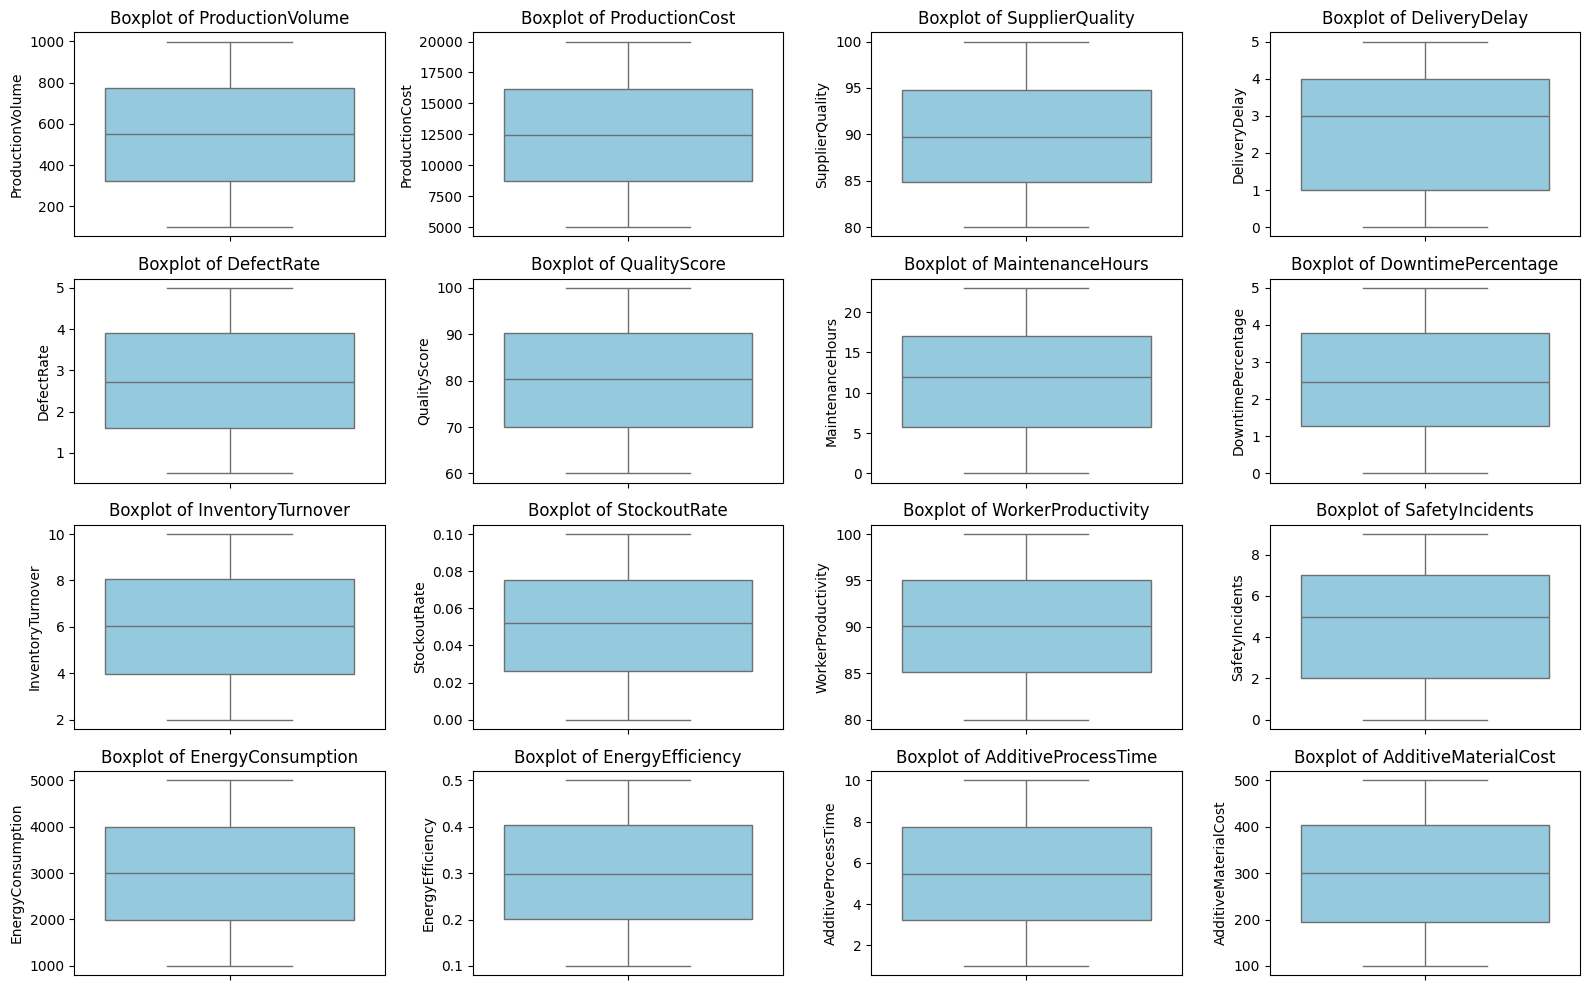

In [11]:
# Boxplot for numerical features
plt.figure(figsize=(16, 10))
for i, col in enumerate(data_ori.select_dtypes(include=[np.number]).columns[:-1], 1):  # Exclude target
    plt.subplot(4, 4, i)
    sns.boxplot(data_ori[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

* All features have relatively narrow and similar distributions. However, the features `DeliveryDelay` and `SafetyIncident` show that the majority of the data is concentrated at lower values.

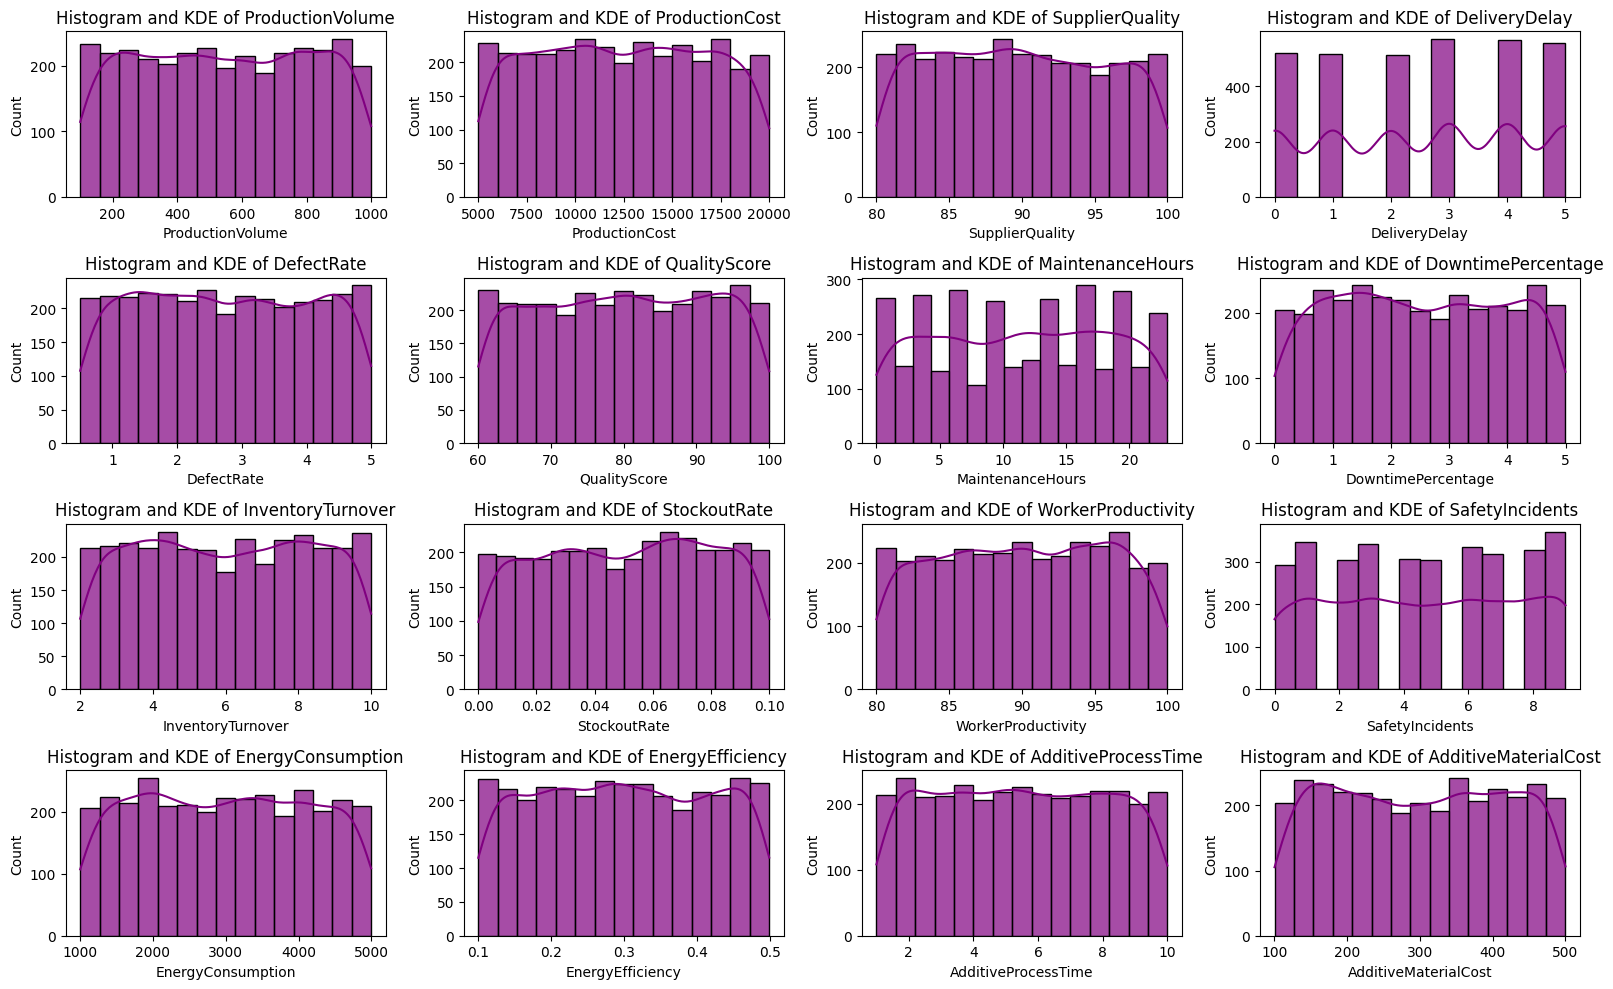

In [12]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(data_ori.select_dtypes(include=[np.number]).columns[:-1], 1):  # Exclude target
    plt.subplot(4, 4, i)
    sns.histplot(data_ori[col], kde=True, color='purple', alpha=0.7)
    plt.title(f'Histogram and KDE of {col}')
    plt.tight_layout()
plt.show()

* Some features, such as `SupplierQuality` and `QualityScore`, exhibit a uniform distribution, indicating a more even spread of the data.
* `DeliveryDelay` appears to have two peaks in its distribution, reflecting two distinct groups within the data.
* `SafetyIncidents` has small peaks, suggesting the possibility of a few unique categories or conditions in the data.

### Pairplot

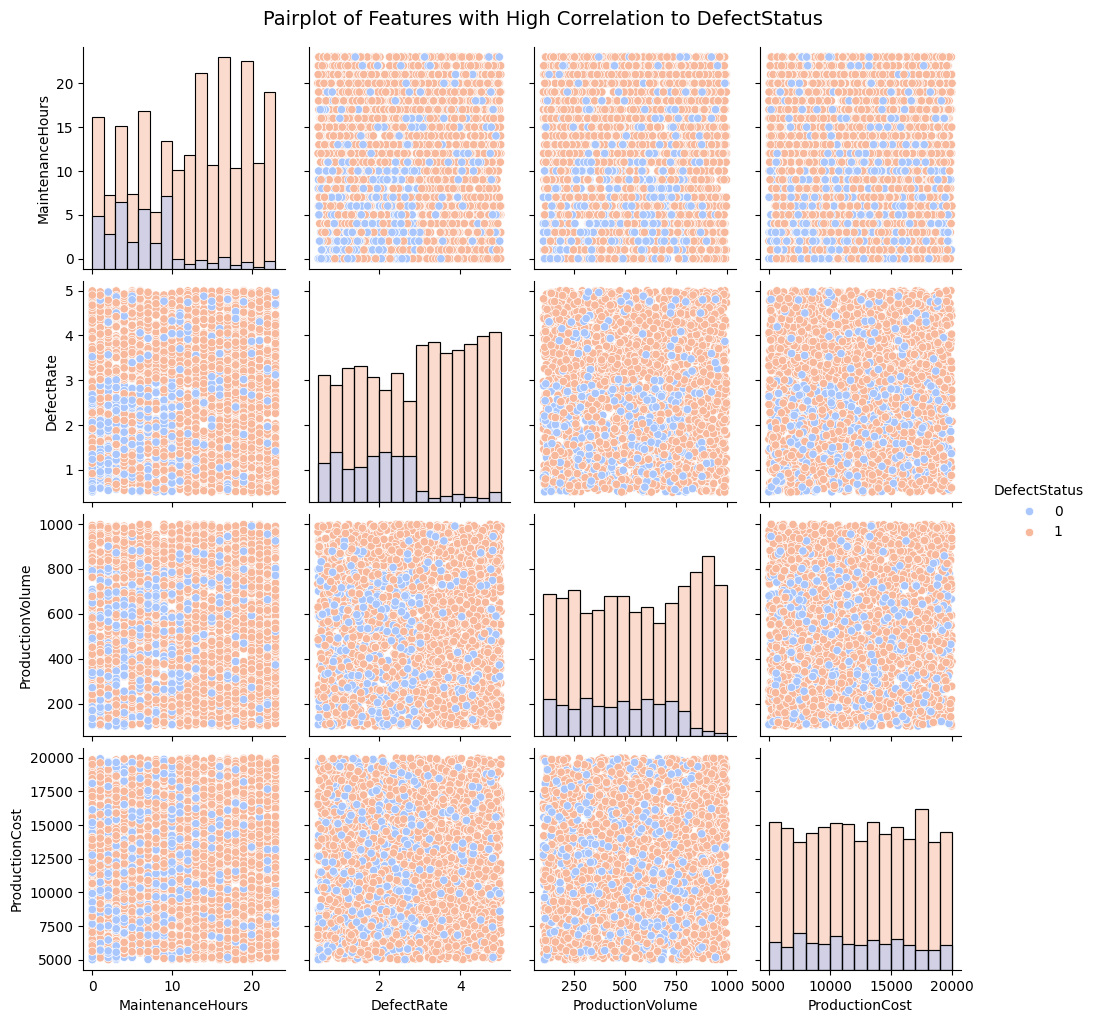

In [13]:
# Selected features with high correlation to DefectStatus

selected_features_pairplot = ['MaintenanceHours', 'DefectRate', 'ProductionVolume', 'ProductionCost', 'DefectStatus']
sns.pairplot(data_ori[selected_features_pairplot], hue='DefectStatus', palette='coolwarm', diag_kind='hist')
plt.suptitle('Pairplot of Features with High Correlation to DefectStatus', y=1.02, fontsize=14)
plt.show()

* `MaintenanceHours` vs `DefectRate` a positive relationship is observed, where products with higher defect rates tend to require more maintenance hours.
* `ProductionCost` vs `ProductionVolume` a positive relationship is evident, with higher production volumes often associated with higher production costs.

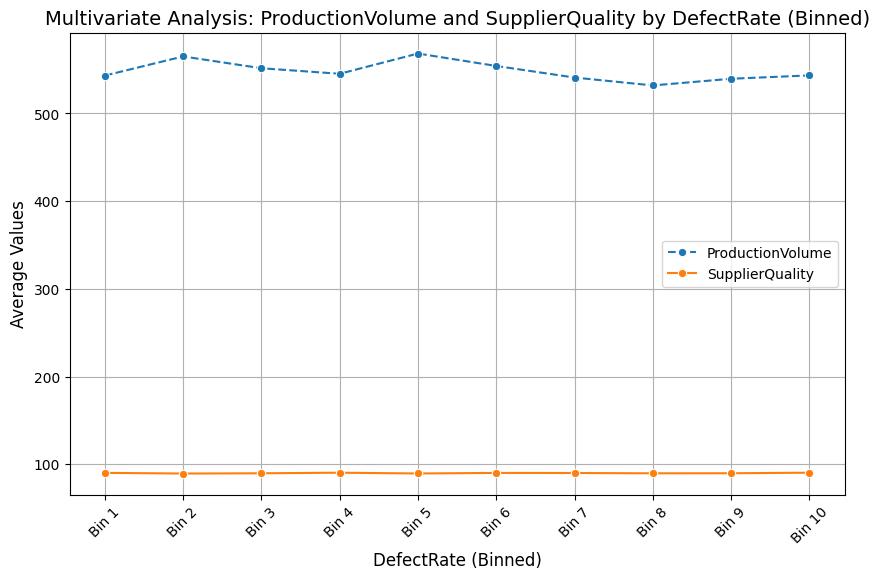

In [14]:
# Binning DefectRate into intervals
data_ori['DefectRateBinned'] = pd.cut(data_ori['DefectRate'], bins=10, labels=False)

# Group by binned DefectRate
grouped_data_defect = data_ori.groupby('DefectRateBinned')[['ProductionVolume', 'SupplierQuality']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='DefectRateBinned', y='ProductionVolume', data=grouped_data_defect, label='ProductionVolume', marker='o', linestyle='--')
sns.lineplot(x='DefectRateBinned', y='SupplierQuality', data=grouped_data_defect, label='SupplierQuality', marker='o', linestyle='-')
plt.title('Multivariate Analysis: ProductionVolume and SupplierQuality by DefectRate (Binned)', fontsize=14)
plt.xlabel('DefectRate (Binned)', fontsize=12)
plt.ylabel('Average Values', fontsize=12)
plt.xticks(ticks=range(10), labels=[f'Bin {i+1}' for i in range(10)], rotation=45)
plt.legend()
plt.grid(True)
plt.show()

* A slight variation is observed where production volume decreases slightly in bins with higher defect rates.
* `SupplierQuality` remains relatively constant across all defect rate levels.

C:\Users\USER\AppData\Local\Temp\ipykernel_7664\2270954956.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stacked_data = data_ori.groupby(['MaintenanceQuartile', 'SupplierQualityQuartile'])['DefectStatus'].value_counts(normalize=True).unstack()


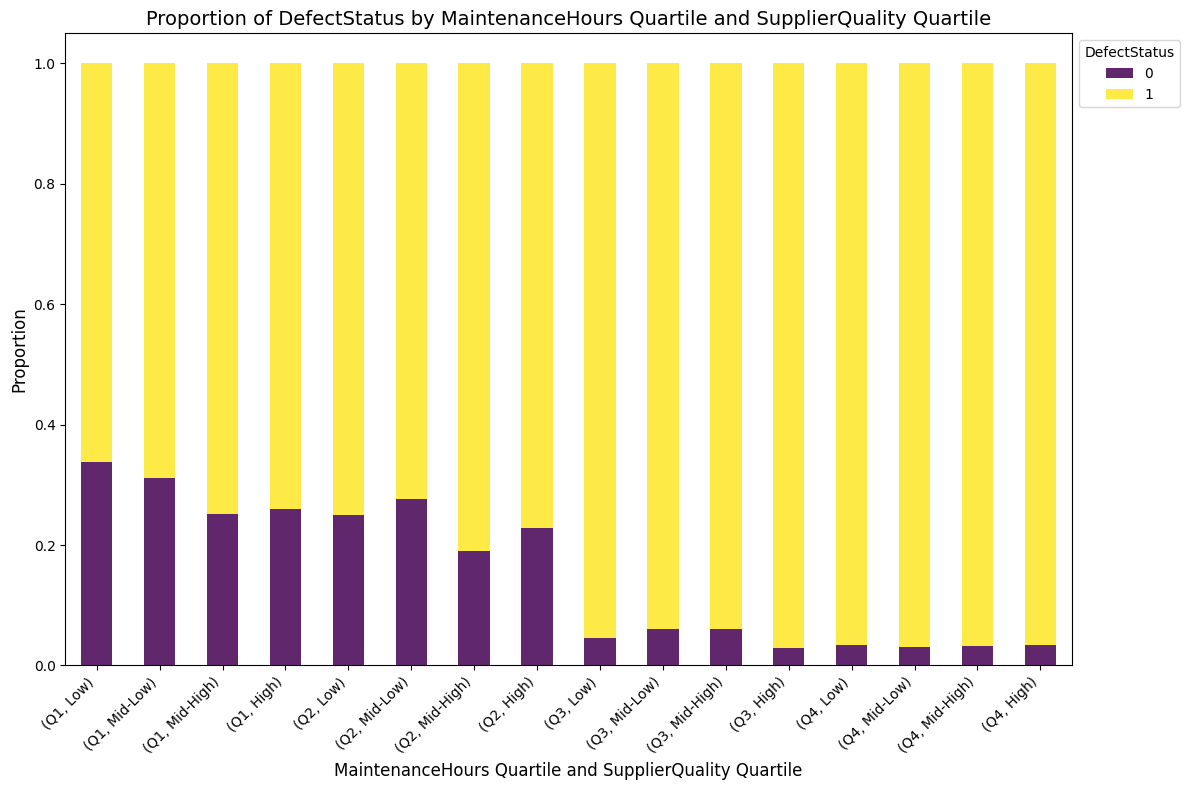

In [15]:
# Ensure the MaintenanceQuartile column exists
if 'MaintenanceQuartile' not in data_ori.columns:
    data_ori['MaintenanceQuartile'] = pd.qcut(data_ori['MaintenanceHours'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Create quartiles for SupplierQuality
data_ori['SupplierQualityQuartile'] = pd.qcut(data_ori['SupplierQuality'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Group data for stacked bar plot
stacked_data = data_ori.groupby(['MaintenanceQuartile', 'SupplierQualityQuartile'])['DefectStatus'].value_counts(normalize=True).unstack()

# Create the stacked bar plot
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis', alpha=0.85)
plt.title('Proportion of DefectStatus by MaintenanceHours Quartile and SupplierQuality Quartile', fontsize=14)
plt.xlabel('MaintenanceHours Quartile and SupplierQuality Quartile', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='DefectStatus', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

* The combination of high maintenance hours (`Q4`) and low supplier quality (`Low`) indicates the highest risk of defects.
* Even within the high maintenance hours quartile (`Q4`), high supplier quality (`High`) still shows a significant proportion of defects.

## Feature Engineering

In [16]:
data = pd.read_csv('manufacturing_defect_dataset.csv')
data.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


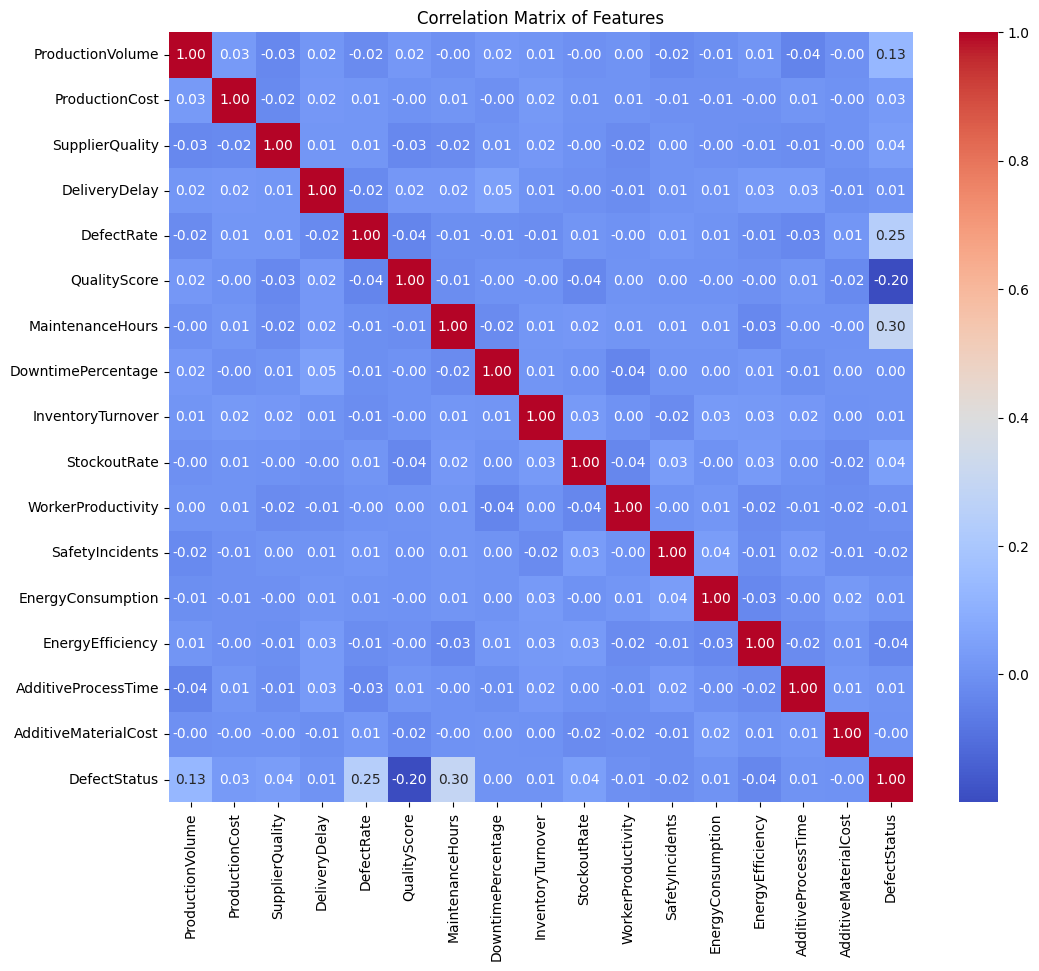

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()

Next, feature selection will be performed based on the **correlation matrix** and **Variance Inflation Factor (VIF) scores** to identify and remove highly correlated or redundant features.

### VIF score calculation

In [18]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Adding a constant column to the features for VIF calculation
features = data.drop(columns=['DefectStatus'])
kons = add_constant(features)

# Calculate VIF
vif_df = pd.DataFrame([vif(kons.values, i) for i in range(kons.shape[1])],
                      index=kons.columns, columns=['vif_score']).reset_index()
vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.loc[vif_df['feature'] != 'const']

vif_df

,feature,vif_score
1,ProductionVolume,1.005544
2,ProductionCost,1.002875
3,SupplierQuality,1.003979
4,DeliveryDelay,1.006107
5,DefectRate,1.004244
6,QualityScore,1.004711
7,MaintenanceHours,1.003024
8,DowntimePercentage,1.004823
9,InventoryTurnover,1.004239
10,StockoutRate,1.005745


* All features have very low VIF scores, indicating no significant multicollinearity.
* However, this does not necessarily mean that all features are relevant to the target. Further analysis, such as feature importance or model performance, may still be needed to determine their relevance.

Therefore, an evaluation of the correlation values with the target `DefectStatus` is conducted to identify the most relevant features for predicting defects. This helps ensure that only meaningful features are retained for modeling.

### Correlation with target

In [19]:
correlation_with_target = data.corr()['DefectStatus'].sort_values(ascending=False)

correlation_with_target

DefectStatus            1.000000
MaintenanceHours        0.297107
DefectRate              0.245746
ProductionVolume        0.128973
StockoutRate            0.040574
SupplierQuality         0.038184
ProductionCost          0.026720
InventoryTurnover       0.006733
AdditiveProcessTime     0.005619
DeliveryDelay           0.005425
EnergyConsumption       0.005039
DowntimePercentage      0.004128
AdditiveMaterialCost   -0.000953
WorkerProductivity     -0.005224
SafetyIncidents        -0.016039
EnergyEfficiency       -0.035031
QualityScore           -0.199219
Name: DefectStatus, dtype: float64

The following features should be dropped, along with the reasoning:
* `WorkerProductivity`: Very weak (-0.005), shows no relationship with the target, making it irrelevant for prediction. 
* `SupplierQuality`: Weak correlation (0.038), its contribution to predicting the target is minimal, and it does not provide significant information.
* `QualityScore`: Moderate negative (-0.199), although moderately negative, the relationship is not strong enough to justify its relevance as a predictive feature.

**Based on domain knowledge:** 
* `WorkerProductivity`: In modern manufacturing, worker productivity has minimal impact on product defects because production is dominated by machinery and automation.
* `SupplierQuality`: Raw materials from suppliers typically undergo internal quality control. After this control, the direct impact of suppliers on product defects becomes minimal.
* `QualityScore`: As a composite metric, the information in `QualityScore` is likely already represented by other features such as `DefectRate` or `DowntimePercentage`, making it redundant.

In [20]:
# Remove redundant features with low correlation with target
features_reduced = features.drop(columns=['WorkerProductivity', 'SupplierQuality', 'QualityScore'])

## Machine Learning Modeling

### Split Dataset

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Define the target and features for modeling
X = features_reduced
y = data['DefectStatus']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
X_train.head()

,ProductionVolume,ProductionCost,DeliveryDelay,DefectRate,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost
2462,392,19257.992314,4,2.588608,7,4.622036,4.686347,0.011286,9,4621.716055,0.321395,6.008936,358.137976
2152,356,8897.422069,2,3.854602,1,1.597137,9.349148,0.092707,5,1004.957503,0.276323,1.275533,252.027421
2636,892,11286.492094,4,2.945703,18,2.697047,2.778415,0.046184,8,3325.943767,0.229907,7.560568,121.834312
834,914,9677.957869,1,3.961341,16,0.350549,8.385408,0.071346,7,1843.587904,0.468389,4.640604,175.541518
150,602,7088.680567,0,4.437655,18,2.497484,9.930432,0.082239,0,4316.087567,0.119634,7.158438,360.344651


### Data Scaling

In [23]:
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model 1: Random Forest Classifier (baseline)

In [24]:
# Baseline Random Forest model
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train_scaled, y_train)

# Predictions for baseline model
y_train_pred_baseline = rf_baseline.predict(X_train_scaled)
y_test_pred_baseline = rf_baseline.predict(X_test_scaled)

# Classification reports for baseline model
print("Random Forest Performance (Baseline Model):")
print("\nTRAIN:")
print(classification_report(y_train, y_train_pred_baseline))
print("TEST:")
print(classification_report(y_test, y_test_pred_baseline))

Random Forest Performance (Baseline Model):

TRAIN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       414
           1       1.00      1.00      1.00      2178

    accuracy                           1.00      2592
   macro avg       1.00      1.00      1.00      2592
weighted avg       1.00      1.00      1.00      2592

TEST:
              precision    recall  f1-score   support

           0       0.59      0.64      0.62       103
           1       0.93      0.92      0.92       545

    accuracy                           0.87       648
   macro avg       0.76      0.78      0.77       648
weighted avg       0.88      0.87      0.88       648



**Finding:**
* Perfect performance on the training set but lower performance on the test set indicates **overfitting**.
* The model performs better at detecting the majority class ("Defect"). Adjustments such as `class weight balancing` or `oversampling` of the minority class are needed to address this imbalance.

In [25]:
# Confusion matrix for baseline model
conf_matrix_train_baseline = confusion_matrix(y_train, y_train_pred_baseline)
conf_matrix_test_baseline = confusion_matrix(y_test, y_test_pred_baseline)

# Display results
print("Baseline Model Confusion Matrix:")
print("TRAIN:")
print(conf_matrix_train_baseline)
print("TEST:")
print(conf_matrix_test_baseline)

Baseline Model Confusion Matrix:
TRAIN:
[[ 414    0]
 [   0 2178]]
TEST:
[[ 66  37]
 [ 45 500]]


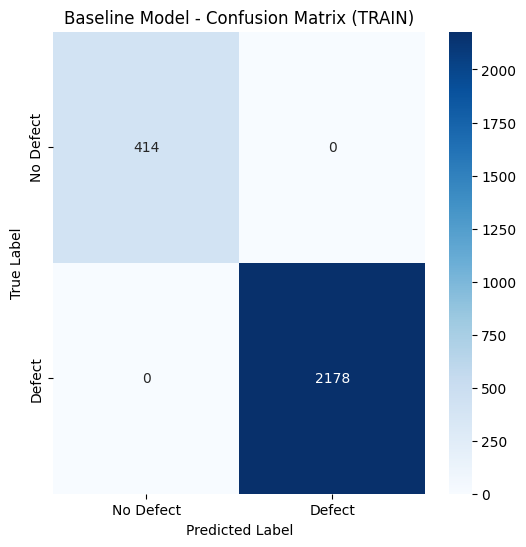

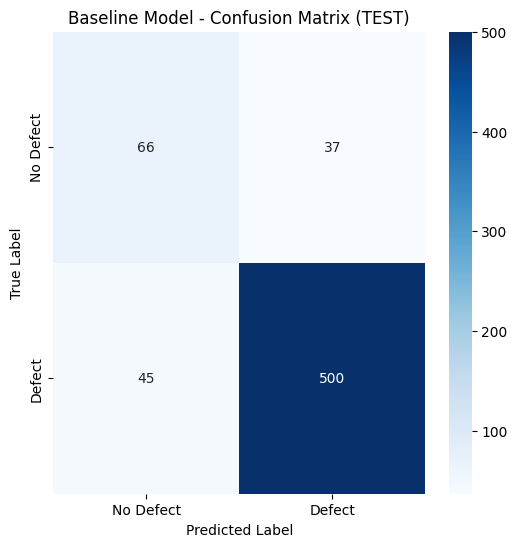

In [26]:
# Visualize the confusion matrix for training set
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_train_baseline, annot=True, fmt="d", cmap="Blues", xticklabels=["No Defect", "Defect"], yticklabels=["No Defect", "Defect"])
plt.title("Baseline Model - Confusion Matrix (TRAIN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualize the confusion matrix for testing set
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_test_baseline, annot=True, fmt="d", cmap="Blues", xticklabels=["No Defect", "Defect"], yticklabels=["No Defect", "Defect"])
plt.title("Baseline Model - Confusion Matrix (TEST)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Finding:** 
* The model demonstrates excellent performance on the "Defect" class, with 500 correct predictions compared to only 45 errors (False Negatives).
* However, performance on the "No Defect" class is relatively lower, with only 66 correct predictions and 37 errors (False Positives).

### Model 2: Random Forest Classifier (Hyperparameter tuning)

In [27]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Define the parameter grid for tuning
param_grid_tuned = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

# Initialize the Random Forest model
rf_tuned = RandomForestClassifier(random_state=42)

cv_tuned = RandomizedSearchCV(estimator=rf_tuned, param_distributions=param_grid_tuned, n_iter=50, cv=3, verbose=1, n_jobs=-1, random_state=42)
cv_tuned.fit(X_train_scaled, y_train)

# Predictions for tuned model
y_train_pred_tuned = cv_tuned.best_estimator_.predict(X_train_scaled)
y_test_pred_tuned = cv_tuned.best_estimator_.predict(X_test_scaled)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [28]:
# Generate and display sorted results
cv_result = pd.DataFrame(cv_tuned.cv_results_)
retain_cols = ['params', 'mean_test_score', 'rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score').head(10)

,params,mean_test_score,rank_test_score
47,"{'n_estimators': 100, 'min_samples_split': 10,...",0.908565,1
25,"{'n_estimators': 300, 'min_samples_split': 10,...",0.908179,2
34,"{'n_estimators': 300, 'min_samples_split': 5, ...",0.908179,2
38,"{'n_estimators': 300, 'min_samples_split': 5, ...",0.907793,4
36,"{'n_estimators': 50, 'min_samples_split': 10, ...",0.907793,4
19,"{'n_estimators': 100, 'min_samples_split': 10,...",0.907407,6
27,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.907022,7
37,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.906636,8
35,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.906636,8
43,"{'n_estimators': 50, 'min_samples_split': 5, '...",0.906250,10


In [29]:
# Classification reports for tuned model
print("\nRandom Forest Performance (Tuned Model):")
print("\nTRAIN:")
print(classification_report(y_train, y_train_pred_tuned))
print("TEST:")
print(classification_report(y_test, y_test_pred_tuned))

# Display the best parameters
print("\nBest Parameters for Tuned Model:")
print(cv_tuned.best_params_)


Random Forest Performance (Tuned Model):

TRAIN:
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       414
           1       0.99      0.93      0.96      2178

    accuracy                           0.94      2592
   macro avg       0.86      0.95      0.90      2592
weighted avg       0.95      0.94      0.94      2592

TEST:
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       103
           1       0.95      0.91      0.93       545

    accuracy                           0.88       648
   macro avg       0.77      0.82      0.79       648
weighted avg       0.89      0.88      0.88       648


Best Parameters for Tuned Model:
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'class_weight': 'balanced', 'bootstrap': False}


**Finding:**
* The tuned model demonstrates better generalization and no overfitting.
* Performance on the minority class (No Defect):
  - Recall improved from 64% (baseline) to 73%.
  - F1-Score improved from 62% (baseline) to 66%.
* Macro average Recall increased from 78% to 82%, indicating improved balance in performance between the two classes.

In [30]:
# Confusion matrix for tuned model
conf_matrix_train_tuned = confusion_matrix(y_train, y_train_pred_tuned)
conf_matrix_test_tuned = confusion_matrix(y_test, y_test_pred_tuned)

print("\nTuned Model Confusion Matrix:")
print("TRAIN:")
print(conf_matrix_train_tuned)
print("TEST:")
print(conf_matrix_test_tuned)


Tuned Model Confusion Matrix:
TRAIN:
[[ 397   17]
 [ 147 2031]]
TEST:
[[ 75  28]
 [ 51 494]]


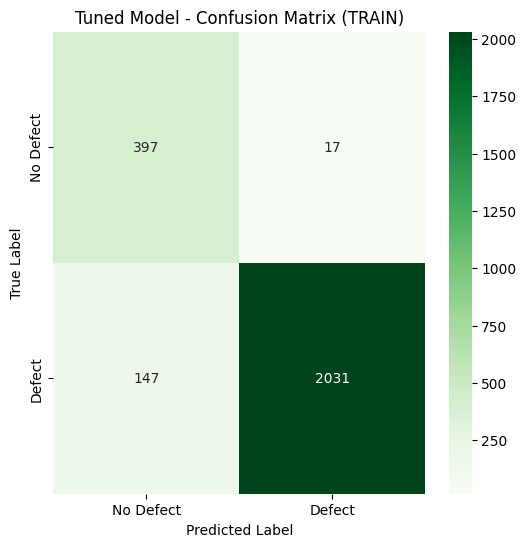

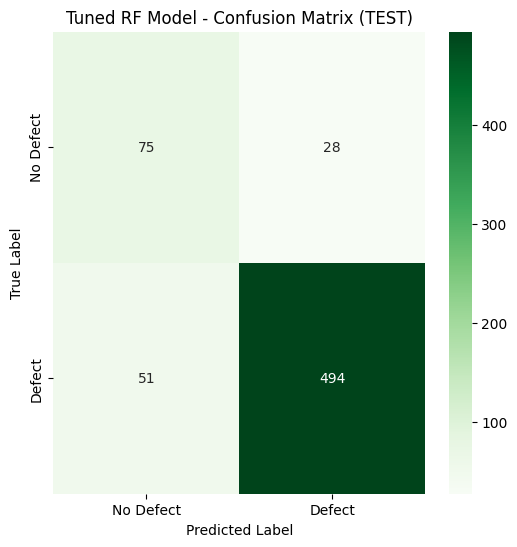

In [31]:
# Visualize the confusion matrix for training set (tuned model)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_train_tuned, annot=True, fmt="d", cmap="Greens", xticklabels=["No Defect", "Defect"], yticklabels=["No Defect", "Defect"])
plt.title("Tuned Model - Confusion Matrix (TRAIN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualize the confusion matrix for testing set (tuned model)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_test_tuned, annot=True, fmt="d", cmap="Greens", xticklabels=["No Defect", "Defect"], yticklabels=["No Defect", "Defect"])
plt.title("Tuned RF Model - Confusion Matrix (TEST)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Finding:**
* With `class_weight='balanced'`, the model gives greater attention to the minority class, resulting in an improved Recall for the No Defect class.
* For the minority class (No Defect):
  - The model detects 75 True Negatives (TN), but there are still 28 False Positives (FP).
  - Nevertheless, this tuned model performs better than the baseline in handling the minority class.

### Feature Importances

In [32]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [33]:
X_train_scaled_df

,ProductionVolume,ProductionCost,DeliveryDelay,DefectRate,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost
0,-0.597205,1.598416,0.843972,-0.131772,-0.638804,1.456808,-0.563236,-1.361939,1.526708,1.413656,0.194747,0.206011,0.508103
1,-0.734820,-0.814157,-0.321802,0.827051,-1.505856,-0.638270,1.416384,1.450762,0.141730,-1.704334,-0.192252,-1.631149,-0.397069
2,1.314120,-0.257836,0.843972,0.138680,0.950791,0.123540,-1.373260,-0.156372,1.180463,0.296577,-0.590798,0.808241,-1.507676
3,1.398218,-0.632401,-0.904690,0.907891,0.661774,-1.501671,1.007222,0.712841,0.834219,-0.981355,1.456884,-0.325075,-1.049529
4,0.205552,-1.235342,-1.487577,1.268637,0.950791,-0.014680,1.663172,1.089131,-1.589491,1.150175,-1.537632,0.652164,0.526927
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,-0.379314,1.387319,0.261085,1.480319,-0.349787,-0.597125,-0.521242,-0.837117,-0.550758,0.356224,0.018938,1.352968,0.625234
2588,1.012131,-1.069797,0.261085,-0.118377,-1.361347,1.654135,1.150395,1.366294,0.834219,1.736941,1.463974,-0.381155,-1.185366
2589,0.022064,-1.503181,-0.904690,-1.269011,-0.638804,-0.768838,1.033413,-0.149396,1.526708,-1.629138,-0.908636,1.354259,-0.951061
2590,-0.337265,-0.971043,1.426859,1.175175,0.372756,-1.395852,0.669453,0.449809,-1.243247,-0.017444,1.522229,1.290248,-0.997263


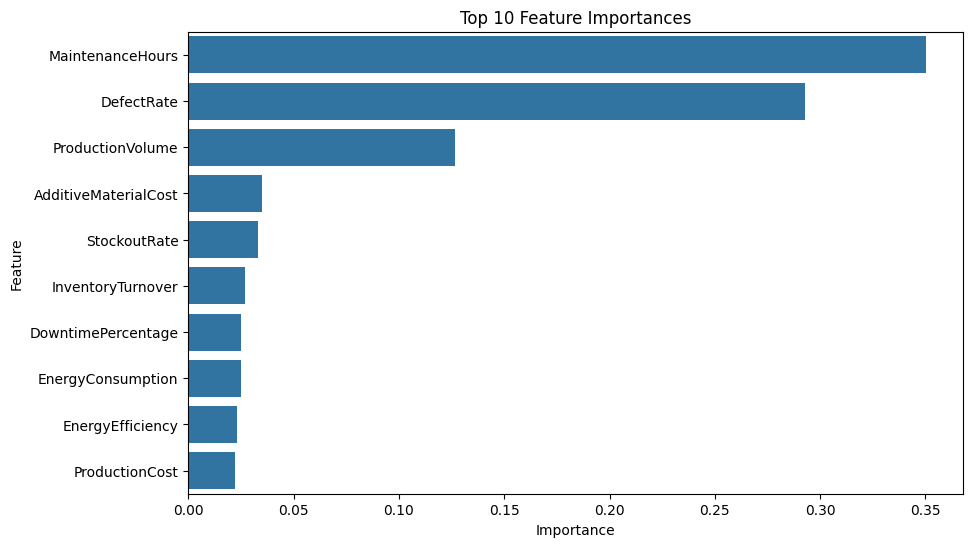

In [34]:
# Get feature importances
importances = cv_tuned.best_estimator_.feature_importances_
feature_names = X_train_scaled_df.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

**Finding:**
* `MaintenanceHours`, `DefectRate` and `ProductionVolume` emerged as the top feature importance for the RandomForest Classifier model.

## Model Comparison

A performance comparison of the tuned Random Forest Classifier model will be conducted with the following models:
* KNN
* Logistic Regression
* SVM
* XGboost

### Tuned KNN model

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}
knn_model = KNeighborsClassifier()
knn_search = RandomizedSearchCV(estimator=knn_model, param_distributions=knn_params, 
                                n_iter=10, cv=3, verbose=1, n_jobs=-1, random_state=42)
knn_search.fit(X_train_scaled, y_train)

# Best estimator and predictions
knn_best = knn_search.best_estimator_
y_pred_knn = knn_best.predict(X_test_scaled)

# Confusion Matrix and Classification Report
knn_cm = confusion_matrix(y_test, y_pred_knn)
knn_cr = classification_report(y_test, y_pred_knn)

print("Best Parameters - KNN:\n", knn_search.best_params_)
print("\nConfusion Matrix - KNN:\n", knn_cm)
print("\nClassification Report - KNN:\n", knn_cr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters - KNN:
 {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}

Confusion Matrix - KNN:
 [[ 24  79]
 [ 20 525]]

Classification Report - KNN:
               precision    recall  f1-score   support

           0       0.55      0.23      0.33       103
           1       0.87      0.96      0.91       545

    accuracy                           0.85       648
   macro avg       0.71      0.60      0.62       648
weighted avg       0.82      0.85      0.82       648



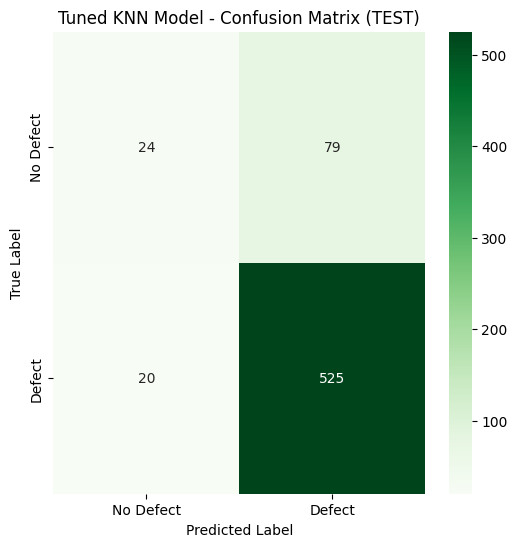

In [36]:
# Visualize the confusion matrix for testing set (tuned model)
plt.figure(figsize=(6, 6))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Greens", xticklabels=["No Defect", "Defect"], yticklabels=["No Defect", "Defect"])
plt.title("Tuned KNN Model - Confusion Matrix (TEST)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Tuned Logistic Regression model

In [37]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
lr_params = {
    "C": [0.1, 1, 10, 100],
    "penalty": ["l1", "l2", "elasticnet"],
    "solver": ["saga"],
    "max_iter": [1000]
}
lr_model = LogisticRegression(random_state=42)
lr_search = RandomizedSearchCV(estimator=lr_model, param_distributions=lr_params, 
                               n_iter=10, cv=3, verbose=1, n_jobs=-1, random_state=42)
lr_search.fit(X_train_scaled, y_train)

# Best estimator and predictions
lr_best = lr_search.best_estimator_
y_pred_lr = lr_best.predict(X_test_scaled)

# Confusion Matrix and Classification Report
lr_cm = confusion_matrix(y_test, y_pred_lr)
lr_cr = classification_report(y_test, y_pred_lr)

print("Best Parameters - Logistic Regression:\n", lr_search.best_params_)
print("\nConfusion Matrix - Logistic Regression:\n", lr_cm)
print("\nClassification Report - Logistic Regression:\n", lr_cr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters - Logistic Regression:
 {'solver': 'saga', 'penalty': 'l2', 'max_iter': 1000, 'C': 1}

Confusion Matrix - Logistic Regression:
 [[ 24  79]
 [ 11 534]]

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.69      0.23      0.35       103
           1       0.87      0.98      0.92       545

    accuracy                           0.86       648
   macro avg       0.78      0.61      0.64       648
weighted avg       0.84      0.86      0.83       648



C:\Users\USER\anaconda3\envs\DS27B_\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\envs\DS27B_\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\envs\DS27B_\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\envs\DS27B_\Lib\site-packages\sklearn\linear_model\_lo

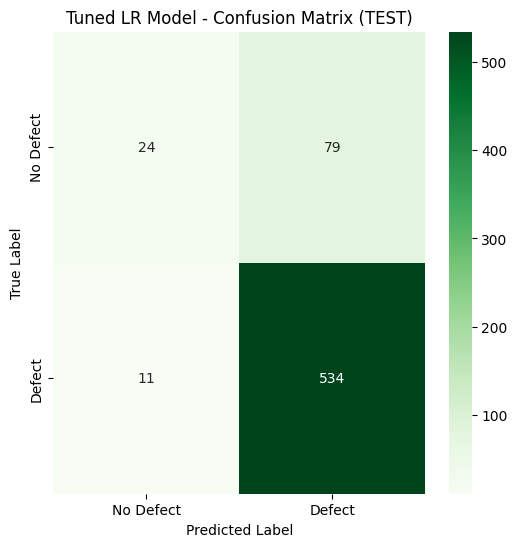

In [38]:
# Visualize the confusion matrix for testing set (tuned model)
plt.figure(figsize=(6, 6))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Greens", xticklabels=["No Defect", "Defect"], yticklabels=["No Defect", "Defect"])
plt.title("Tuned LR Model - Confusion Matrix (TEST)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Tuned XGboost model

In [39]:
from xgboost import XGBClassifier

# Define hyperparameter grid for XGBoost
xgb_params = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "max_depth": [3, 5, 7, 10],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "scale_pos_weight": [1, 2, 5]  # Handling class imbalance
}

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# RandomizedSearchCV for hyperparameter tuning
xgb_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_params, 
                                n_iter=10, cv=3, verbose=1, n_jobs=-1, random_state=42)
xgb_search.fit(X_train_scaled, y_train)

# Best estimator and predictions
xgb_best = xgb_search.best_estimator_
y_pred_xgb = xgb_best.predict(X_test_scaled)

# Confusion Matrix and Classification Report
xgb_cm = confusion_matrix(y_test, y_pred_xgb)
xgb_cr = classification_report(y_test, y_pred_xgb)

print("Best Parameters - XGBoost:\n", xgb_search.best_params_)
print("\nConfusion Matrix - XGBoost:\n", xgb_cm)
print("\nClassification Report - XGBoost:\n", xgb_cr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\USER\anaconda3\envs\DS27B_\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:24:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters - XGBoost:
 {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 1.0}

Confusion Matrix - XGBoost:
 [[ 68  35]
 [ 47 498]]

Classification Report - XGBoost:
               precision    recall  f1-score   support

           0       0.59      0.66      0.62       103
           1       0.93      0.91      0.92       545

    accuracy                           0.87       648
   macro avg       0.76      0.79      0.77       648
weighted avg       0.88      0.87      0.88       648



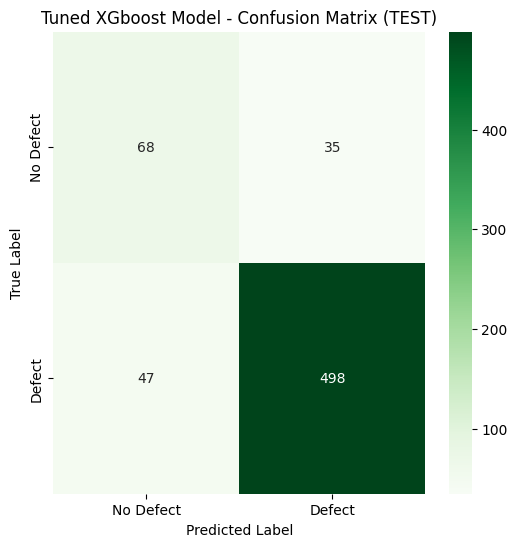

In [40]:
# Visualize the confusion matrix for testing set (tuned model)
plt.figure(figsize=(6, 6))
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Greens", xticklabels=["No Defect", "Defect"], yticklabels=["No Defect", "Defect"])
plt.title("Tuned XGboost Model - Confusion Matrix (TEST)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Tuned SVM model

In [41]:
from sklearn.svm import SVC

# Define hyperparameter grid for SVM
svm_params = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"],
    "class_weight": ["balanced"]  # Handling class imbalance
}

# Initialize SVM model
svm_model = SVC(probability=True, random_state=42)

# RandomizedSearchCV for hyperparameter tuning
svm_search = RandomizedSearchCV(estimator=svm_model, param_distributions=svm_params, 
                                n_iter=10, cv=3, verbose=1, n_jobs=-1, random_state=42)
svm_search.fit(X_train_scaled, y_train)

# Best estimator and predictions
svm_best = svm_search.best_estimator_
y_pred_svm = svm_best.predict(X_test_scaled)

# Confusion Matrix and Classification Report
svm_cm = confusion_matrix(y_test, y_pred_svm)
svm_cr = classification_report(y_test, y_pred_svm)

print("Best Parameters - SVM:\n", svm_search.best_params_)
print("\nConfusion Matrix - SVM:\n", svm_cm)
print("\nClassification Report - SVM:\n", svm_cr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters - SVM:
 {'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'C': 10}

Confusion Matrix - SVM:
 [[ 54  49]
 [ 79 466]]

Classification Report - SVM:
               precision    recall  f1-score   support

           0       0.41      0.52      0.46       103
           1       0.90      0.86      0.88       545

    accuracy                           0.80       648
   macro avg       0.66      0.69      0.67       648
weighted avg       0.83      0.80      0.81       648



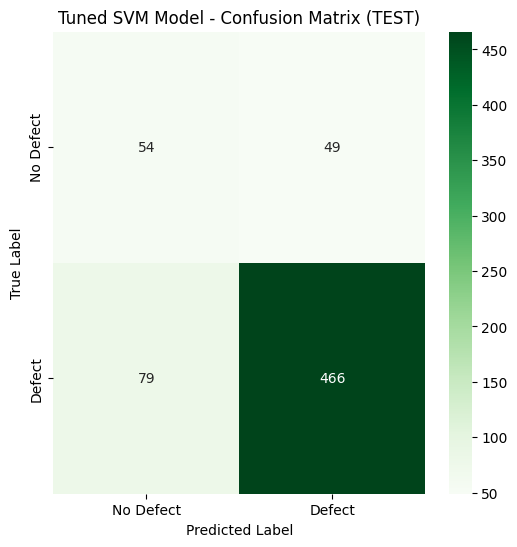

In [42]:
# Visualize the confusion matrix for testing set (tuned model)
plt.figure(figsize=(6, 6))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Greens", xticklabels=["No Defect", "Defect"], yticklabels=["No Defect", "Defect"])
plt.title("Tuned SVM Model - Confusion Matrix (TEST)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Comparison of tuned model performance:**
* Random Forest (RF): A well-balanced model with good performance for both classes (No Defect and Defect).
* XGBoost: Similar to RF but slightly weaker in recognizing the No Defect class.
* LR: Performs well for the Defect class but poorly for the No Defect class (Recall only 0.52)..
* KNN dan SVM: Both models perform poorly in recognizing the No Defect class and are therefore not recommended.

### AUC-ROC curve

C:\Users\USER\anaconda3\envs\DS27B_\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:24:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


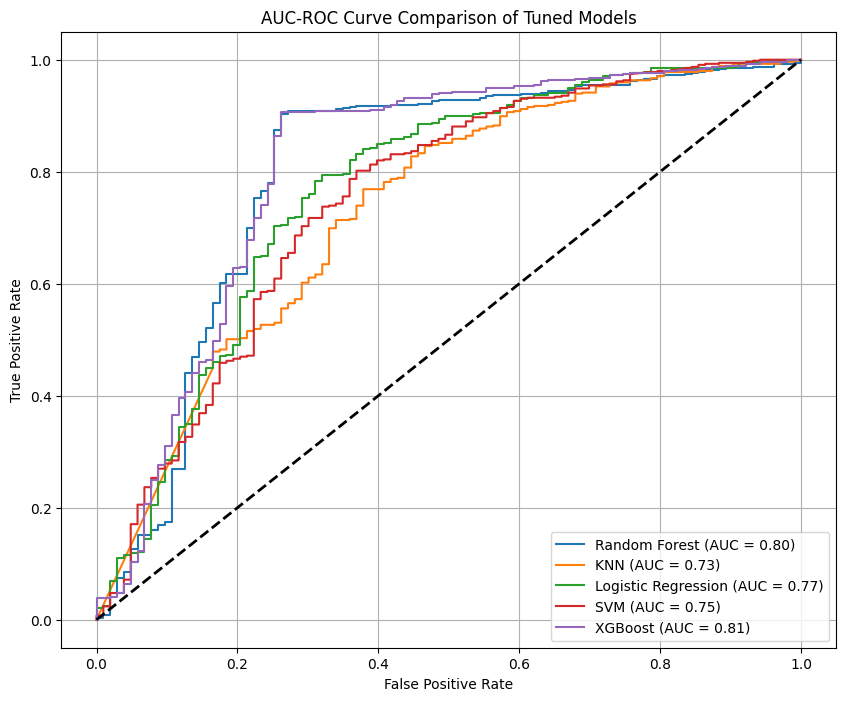

In [43]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Define best parameters from previous tuning
best_params = {
    "Random Forest": {"n_estimators": 100, "min_samples_split": 10, "min_samples_leaf": 2, "max_depth": 10, "class_weight": "balanced", "bootstrap": False},
    "KNN": {"n_neighbors": 7, "weights": "distance", "metric": "manhattan"},
    "Logistic Regression": {"C": 1, "penalty": "l2", "solver": "saga", "class_weight": "balanced", "max_iter": 1000},
    "SVM": {"C": 10, "kernel": "rbf", "gamma": "scale", "class_weight": "balanced"},
    "XGBoost": {"n_estimators": 300, "learning_rate": 0.01, "max_depth": 7, "subsample": 0.8, "colsample_bytree": 0.8, "scale_pos_weight": 1, "min_child_weight": 5}
}

# Define and fit models with best parameters
tuned_models = {
    "Random Forest": RandomForestClassifier(random_state=42, **best_params["Random Forest"]),
    "KNN": KNeighborsClassifier(**best_params["KNN"]),
    "Logistic Regression": LogisticRegression(random_state=42, **best_params["Logistic Regression"]),
    "SVM": SVC(probability=True, random_state=42, **best_params["SVM"]),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', **best_params["XGBoost"])
}

# Store AUC-ROC data for tuned models
roc_data_tuned = {}

for model_name, model in tuned_models.items():
    model.fit(X_train_scaled, y_train)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test_scaled)
    else:
        continue

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    roc_data_tuned[model_name] = (fpr, tpr, roc_auc)

# Plot AUC-ROC Curve for all tuned models
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in roc_data_tuned.items():
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve Comparison of Tuned Models')
plt.legend(loc="lower right")
plt.grid()
plt.show()

* XGBoost and Random Forest are the top-performing models, with AUC values close to 1, indicating excellent capability in distinguishing between classes.
* Logistic Regression is a decent alternative with an AUC of 0.77.
* SVM and KNN have lower performance compared to the other models.


## Conclusions

* Random Forest (RF) and XGBoost demonstrated the best performance in predicting defect levels, with AUC values of 0.80 and 0.81, respectively.
   - The tuned RF model successfully improved Recall for the No Defect (`0`) class from 64% (baseline) to 73%.

* Insights from EDA and Machine Learning modeling with `Random Forest Classifier`: 
   - Key variables influencing defect levels: `MaintenanceHours`, `DefectRate`, and `ProductionVolume`.
   - High defect risk in batches with a history of high defect rates: These batches are more likely to have subsequent defects.
   - Significant defect risk identified in the combination of high `MaintenanceHours` and low `SupplierQuality`: This highlights critical areas for intervention.

## Recommendations

* Implement preventive maintenance with a well-planned schedule to minimize downtime.
* Focus on additional inspections for batches with a history of high defect rates, such as introducing multi-level Final Quality Control (FQC) processes.
* Ensure production capacity does not exceed manageable limits, for example, by optimizing production planning in coordination with the procurement and production planning departments.
* Strengthen supplier audits and select partners who meet higher quality standards.

## Thank You